# Bài tập lập trình: SGD với dữ liệu thực tế

```
ProtonX - TensorFlow Class
```

### Hướng dẫn làm bài
- Trong bài tập này bạn sẽ sử dụng Python 3.


### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**


Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO` và thay thế các vị trí `None`.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó.

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Phải có log quá trình training
* Mean Square Error nhỏ hơn hoặc bằng 2535885073

In [1]:
# import tensorflow as tf
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
val_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
train_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

### Chuẩn hóa dữ liệu

In [ ]:
X_train = train_df.drop('median_house_value', axis = 1)
y_train = train_df['median_house_value']

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = StandardScaler()

column_names_to_normalize = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households']

x = X_train[column_names_to_normalize].values

x_scaled = min_max_scaler.fit_transform(x)

normalized_features = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = X_train.index)

X_train[column_names_to_normalize] = normalized_features

In [ ]:
standard_scaler = StandardScaler()

column_names_to_standardize = ['housing_median_age', 'median_income']

x = X_train[column_names_to_standardize].values

x_scaled = standard_scaler.fit_transform(x)

standardized_features = pd.DataFrame(x_scaled, columns=column_names_to_standardize, index = X_train.index)

X_train[column_names_to_standardize] = standardized_features

In [ ]:
X_train

array([[ 1.        ,  0.17534538, -1.07967114, ...,  0.07745437,
        -1.25254316,  1.        ],
       [ 0.98406375,  0.19766206, -0.76187201, ...,  0.07597435,
        -1.08148298,  1.        ],
       [ 0.9750996 ,  0.12221041, -0.92077158, ...,  0.01907581,
        -1.17010515,  1.        ],
       ...,
       [ 0.00498008,  0.98831031, -0.92077158, ...,  0.07482322,
        -0.44666313,  1.        ],
       [ 0.00498008,  0.98405951, -0.76187201, ...,  0.07844105,
        -0.99778717,  1.        ],
       [ 0.        ,  0.8501594 ,  1.85997083, ...,  0.04423615,
        -0.45536288,  1.        ]])

### Tiến hành training

In [ ]:
import numpy as np
m, n = X_train.shape
ones = np.ones((m, 1))
X_train = np.concatenate((X_train, ones), axis=1)


In [ ]:
X_train

array([[ 1.        ,  0.17534538, -1.07967114, ...,  0.07745437,
        -1.25254316,  1.        ],
       [ 0.98406375,  0.19766206, -0.76187201, ...,  0.07597435,
        -1.08148298,  1.        ],
       [ 0.9750996 ,  0.12221041, -0.92077158, ...,  0.01907581,
        -1.17010515,  1.        ],
       ...,
       [ 0.00498008,  0.98831031, -0.92077158, ...,  0.07482322,
        -0.44666313,  1.        ],
       [ 0.00498008,  0.98405951, -0.76187201, ...,  0.07844105,
        -0.99778717,  1.        ],
       [ 0.        ,  0.8501594 ,  1.85997083, ...,  0.04423615,
        -0.45536288,  1.        ]])

In [ ]:
# Tạo tham số theta (9, ) -> (9, 1)
theta = np.random.normal(size=X_train.shape[1]).reshape((X_train.shape[1], 1))

X_train.dot(theta).shape

# Chuyển chiều từ (17000, ) -> (17000, 1)
y_train = y_train.values.reshape(-1, 1)


In [ ]:
X_train.shape, theta.shape, y_train.shape

((17000, 9), (9, 1), (17000, 1))

### Xây dựng mô hình SGD tại đây

In [ ]:
from sklearn.utils import shuffle

learning_rate = 0.01

def hypo(X, theta):
  # TODO 1: Tính toán hàm giả thiết
    return np.dot(X, theta)

def cost(X, y, theta, m):
  # TODO 2: Tính giá trị mất mát trên toàn bộ tập dữ liệu
    predictions = hypo(X, theta)
    return  1/(2 * m) * np.sum((predictions - y) ** 2)

def SGD(X, y, theta, learning_rate, epochs):
  m = len(X)
  cost_history= cost(X, y, theta, m)

  for epoch in range(epochs):
        # TODO 3: Xóa dữ liệu
        X, y = shuffle(X, y)
        # TODO 4: Cập nhật bộ tham số
        for i in range(m):
            # Lấy mẫu ngẫu nhiên
            xi = X[i:i+1]
            yi = y[i:i+1]

            # Tính giá trị dự đoán
            prediction_error = hypo(xi, theta)

            # Tính gradient
            # gradient = np.dot(xi.T, (prediction_error - yi))
            gradient = np.dot(xi.T, (prediction_error - yi))
            # Cập nhật theta
            theta = theta - learning_rate * gradient
            # Tính và lưu giá trị mất mát sau mỗi mẫu
        cost_history= cost(X, y, theta, m)
        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}: Cost = {cost_history}")
  return theta




### Tiến hành Training

In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)

Epoch 500: Cost = 3124000867.6399236


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)

Epoch 500: Cost = 2967304602.675047


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)


Epoch 500: Cost = 2861664399.41232


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2787035165.82664
[[-194911.08310206]
 [-191505.05627497]
 [  21403.7015077 ]
 [  -4711.69968988]
 [ 112038.8291432 ]
 [ -49246.55190269]
 [  95485.94298069]
 [  78736.42742165]
 [ 347717.2333281 ]]


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2733279961.008885
[[-235471.60660095]
 [-226733.75609215]
 [  20385.31606328]
 [ -16904.86540217]
 [ 122270.74760679]
 [ -69482.74414755]
 [ 100214.66412991]
 [  78006.25979748]
 [ 379104.60073572]]


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2693975378.169344
[[-269183.96674888]
 [-256044.725131  ]
 [  19493.98959661]
 [ -28288.81390374]
 [ 132063.02915354]
 [ -89725.24385608]
 [ 104080.16920314]
 [  77392.10029234]
 [ 405302.54582073]]


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2642609854.3663373
[[-320576.06356301]
 [-300782.20809241]
 [  18112.41198539]
 [ -48314.41242745]
 [ 151419.2050385 ]
 [-129612.50415573]
 [ 110643.65123622]
 [  76495.24189918]
 [ 445384.87492893]]


In [ ]:
epochs = 500
learning_rate = 0.00001
theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2664758210.9248857
[[-297223.79235666]
 [-280446.4200755 ]
 [  18749.73075345]
 [ -38743.77552212]
 [ 141745.42750744]
 [-109792.27788107]
 [ 107497.66583119]
 [  76877.79949374]
 [ 427173.96821703]]


In [ ]:
epochs = 500
learning_rate = 0.00001

theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2625434239.8977747
[[-340012.08957284]
 [-317720.81881994]
 [  17602.1090544 ]
 [ -57091.90571158]
 [ 161106.42453392]
 [-149155.74911423]
 [ 113604.18961809]
 [  76172.30708543]
 [ 460576.54278988]]


In [ ]:
epochs = 500
learning_rate = 0.00001

theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2611772449.1987095
[[-356188.74198026]
 [-331833.59203594]
 [  17142.30433563]
 [ -65176.32224629]
 [ 170796.36341447]
 [-168410.95702585]
 [ 116422.25321255]
 [  75906.48057697]
 [ 473241.81443838]]


In [ ]:
epochs = 500
learning_rate = 0.00001

theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2600609010.5329895
[[-369651.09828227]
 [-343588.57657138]
 [  16788.64535839]
 [ -72662.3342696 ]
 [ 180467.53295888]
 [-187375.83147434]
 [ 119121.26096707]
 [  75701.47923253]
 [ 483804.80138362]]


In [ ]:
epochs = 1000
learning_rate = 0.00001

theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2591236314.547888
Epoch 1000: Cost = 2583161063.9395437
[[-390193.24389202]
 [-361556.09994749]
 [  16221.99483373]
 [ -86157.90487386]
 [ 199669.69603305]
 [-224438.39334367]
 [ 124219.8608101 ]
 [  75434.01614119]
 [ 499898.86981069]]


In [ ]:
epochs = 1000
learning_rate = 0.00001

theta=SGD(X_train, y_train, theta, learning_rate, epochs)
print(theta)

Epoch 500: Cost = 2576037246.5475316
Epoch 1000: Cost = 2569625942.5959773
[[-404382.651031  ]
 [-374009.15080854]
 [  15839.65147876]
 [ -98096.37815955]
 [ 218580.77886358]
 [-260357.15754143]
 [ 128993.14977812]
 [  75212.4052709 ]
 [ 511109.95461143]]


In [ ]:
import numpy as np
from sklearn.utils import shuffle

def hypo(X, theta):
    return np.dot(X, theta)

# def cost(X, y, theta, m, lambda_):
#     predictions = hypo(X, theta)
#     regularization = (lambda_ / (2 * m)) * np.sum(theta[:-1] ** 2)  # Không bao gồm bias
#     return 1 / (2 * m) * np.sum((predictions - y) ** 2) + regularization
def cost(X, y, theta, m):
  # TODO 2: Tính giá trị mất mát trên toàn bộ tập dữ liệu
    predictions = hypo(X, theta)
    return  1/(2 * m) * np.sum((predictions - y) ** 2)
# def SGD(X, y, theta, learning_rate, epochs, lambda_):
#     m = len(X)
#     cost_history = cost(X, y, theta, m)

#     for epoch in range(epochs):
#         X, y = shuffle(X, y)
#         for i in range(m):
#             xi = X[i:i+1]
#             yi = y[i:i+1]
#             prediction_error = hypo(xi, theta)
#             gradient = np.dot(xi.T, (prediction_error - yi))
#             theta[:-1] = theta[:-1] * (1 - learning_rate * lambda_ / m) - learning_rate * gradient[:-1]  # Cập nhật các trọng số
#             theta[-1] = theta[-1] - learning_rate * gradient[-1]  # Cập nhật bias

#         cost_history = cost(X, y, theta, m)
#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch {epoch + 1}: Cost = {cost_history}")

#     return theta

def SGD(X_train, y_train, X_test, y_test, theta, learning_rate, epochs, lambda_, drop_column_indexes):
    # Loại bỏ các cột chỉ định
    X_train = np.delete(X_train, drop_column_indexes, axis=1)
    X_test = np.delete(X_test, drop_column_indexes, axis=1)
    theta = np.delete(theta, drop_column_indexes, axis=0)
    m = len(X_train)
    cost_history_train = []
    cost_history_test = []

    for epoch in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for i in range(m):
            xi = X_train[i:i+1]
            yi = y_train[i:i+1]
            prediction_error = hypo(xi, theta)
            gradient = np.dot(xi.T, (prediction_error - yi))
            theta[:-1] = theta[:-1] * (1 - learning_rate * lambda_ / m) - learning_rate * gradient[:-1]  # Cập nhật các trọng số
            theta[-1] = theta[-1] - learning_rate * gradient[-1]  # Cập nhật bias

        if (epoch + 1) % 100 == 0:
            cost_train = cost(X_train, y_train, theta, m)
            cost_test = cost(X_test, y_test, theta, len(X_test))
            cost_history_train.append(cost_train)
            cost_history_test.append(cost_test)
            print(f"Epoch {epoch + 1}: Train Cost = {cost_train}, Test Cost = {cost_test}")

    return theta, cost_history_train, cost_history_test



In [ ]:
X_train.shape

(17000, 9)

In [ ]:
epochs = 500
learning_rate = 0.0001
lambda_=0
# theta = np.array([[-390193.24389202],
#  [-361556.09994749],
#  [  16221.99483373],
#  [ -86157.90487386],
#  [ 199669.69603305],
#  [-224438.39334367],
#  [ 124219.8608101 ],
#  [  75434.01614119],
#  [ 499898.86981069]])
# Tạo tham số theta (9, ) -> (9, 1)
theta = np.random.normal(size=X_train.shape[1]).reshape((X_train.shape[1], 1))
theta,cost_history_train,cost_history_test=SGD(X_train, y_train,X_test,y_test, theta, learning_rate, epochs,lambda_,[0,1])
print(theta)

Epoch 100: Train Cost = 3177640432.818006, Test Cost = 3169057043.044487
Epoch 200: Train Cost = 3156467679.3802476, Test Cost = 3131529351.766614
Epoch 300: Train Cost = 3137743773.830235, Test Cost = 3107413430.8017516
Epoch 400: Train Cost = 3120336711.788991, Test Cost = 3087884493.381107
Epoch 500: Train Cost = 3104189086.8742895, Test Cost = 3085514034.003949
[[  25639.33161339]
 [-101472.79400087]
 [ 187506.90358886]
 [-144910.40210433]
 [ 160860.86703092]
 [  84885.39403871]
 [ 191336.4292991 ]]


In [ ]:
epochs = 1000
learning_rate = 0.00001
theta = np.array([[-390193.24389202],
 [-361556.09994749],
 [ 25685.40333263],
 [-105751.51877699],
 [  190768.70492871],
 [-149782.58461894],
 [ 163443.15344026 ],
 [  84492.7466552],
 [ 191269.83448688]])
theta,cost_history_train,cost_history_test=SGD(X_train, y_train,X_test,y_test, theta, learning_rate, epochs,lambda_,[5])
print(theta)

Epoch 100: Train Cost = 2707798406.9911838, Test Cost = 2717651052.5578194
Epoch 200: Train Cost = 2696437450.7810235, Test Cost = 2702066790.468205
Epoch 300: Train Cost = 2687963383.62685, Test Cost = 2690142628.0706615
Epoch 400: Train Cost = 2681155106.5409064, Test Cost = 2680708493.103758
Epoch 500: Train Cost = 2675563827.65556, Test Cost = 2673289273.164889
Epoch 600: Train Cost = 2670888096.210586, Test Cost = 2667082481.765676
Epoch 700: Train Cost = 2666909753.5806975, Test Cost = 2661947644.5754356
Epoch 800: Train Cost = 2663469954.5851874, Test Cost = 2657673720.1099315
Epoch 900: Train Cost = 2660452631.484444, Test Cost = 2654039020.947621
Epoch 1000: Train Cost = 2657771998.265424, Test Cost = 2650863255.295163
[[-332513.19882418]
 [-308902.90834894]
 [  18350.54414581]
 [-145700.29724281]
 [ 180456.75970097]
 [ 139092.01146331]
 [  77428.49380477]
 [ 450603.5070972 ]]


In [ ]:
epochs = 200
learning_rate = 0.001
lambda_  = 0
theta = np.array([
    [-332513.19882418],
 [-308902.90834894],
 [ 18350.54414581],
 [-145700.29724281],
 [  180456.75970097],
 [-149782.58461894],
 [ 139092.01146331 ],
 [  77428.49380477],
 [ 450603.5070972]])
theta,cost_history_train,cost_history_test=SGD(X_train, y_train,X_test,y_test, theta, learning_rate, epochs,lambda_,[])
print(theta)

Epoch 100: Train Cost = 2416182547.395025, Test Cost = 2450211638.0447636
Epoch 200: Train Cost = 2419563003.6109524, Test Cost = 2442786913.1156993
[[-86059.63435723]
 [-90105.86397348]
 [ 12786.17239666]
 [-17565.39851017]
 [ 51765.77403371]
 [-46477.58276628]
 [ 17410.80631682]
 [ 75097.72821871]
 [205495.28711453]]


In [ ]:
epochs = 10000
learning_rate = 0.00001
theta = np.array([
    [-425039.32949338],
 [-388506.77807312],
 [ 15208.81429746],
 [-282066.15064966],
 [  299852.96620581],
 [299852.96620581],
 [ 89144.92807427 ],
 [  77001.7484637],
 [524635.98547308]])
theta,cost_history_train,cost_history_test=SGD(X_train, y_train,X_test,y_test, theta, learning_rate, epochs,lambda_,[5])
print(theta)

Epoch 100: Train Cost = 2611183203.185036, Test Cost = 2605419733.0873294
Epoch 200: Train Cost = 2611029687.7256975, Test Cost = 2605247999.338842
Epoch 300: Train Cost = 2610876853.3904924, Test Cost = 2605116479.341996
Epoch 400: Train Cost = 2610724744.1396227, Test Cost = 2604971964.031735
Epoch 500: Train Cost = 2610573200.793031, Test Cost = 2604769292.0559916
Epoch 600: Train Cost = 2610422526.8164415, Test Cost = 2604679641.3163557
Epoch 700: Train Cost = 2610272321.223107, Test Cost = 2604500176.127105
Epoch 800: Train Cost = 2610122927.114082, Test Cost = 2604256136.5676847
Epoch 900: Train Cost = 2609974031.3225427, Test Cost = 2604140809.498011
Epoch 1000: Train Cost = 2609825981.381203, Test Cost = 2604063442.8981586
Epoch 1100: Train Cost = 2609678396.8777027, Test Cost = 2603876356.1725016
Epoch 1200: Train Cost = 2609531367.207212, Test Cost = 2603722800.8424134
Epoch 1300: Train Cost = 2609385173.578019, Test Cost = 2603633038.6908617
Epoch 1400: Train Cost = 26092393

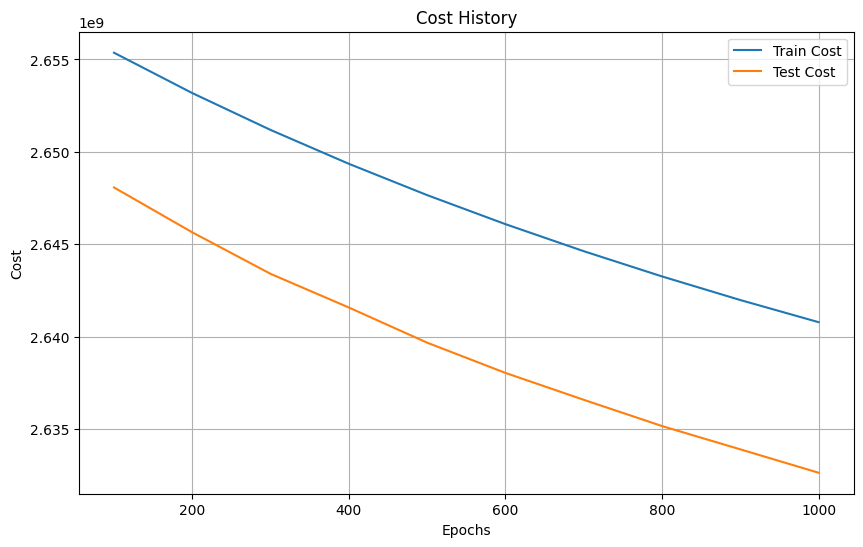

In [ ]:
import matplotlib.pyplot as plt

# Giả sử cost_history_train và cost_history_test là các danh sách bạn đã tính toán
# và epochs là số lượng epochs bạn đã huấn luyện.

# Tạo một danh sách các giá trị epoch (mỗi 100 epochs)
epoch_values = list(range(100, epochs + 1, 100))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(epoch_values, cost_history_train, label='Train Cost')
plt.plot(epoch_values, cost_history_test, label='Test Cost')

plt.title('Cost History')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
epochs = 2000
learning_rate = 0.000001

theta=SGD(X_train, y_train, theta, learning_rate, epochs,lambda_)
print(theta)

Epoch 100: Cost = 2582409946.5500526
Epoch 200: Cost = 2582260953.718622
Epoch 300: Cost = 2582112324.8949323
Epoch 400: Cost = 2581964058.3985696
Epoch 500: Cost = 2581816151.566245
Epoch 600: Cost = 2581668602.6157103
Epoch 700: Cost = 2581521409.206415
Epoch 800: Cost = 2581374569.4775558
Epoch 900: Cost = 2581228080.840184
Epoch 1000: Cost = 2581081941.8856864
Epoch 1100: Cost = 2580936150.1498075
Epoch 1200: Cost = 2580790703.6225095
Epoch 1300: Cost = 2580645600.498255
Epoch 1400: Cost = 2580500838.325038
Epoch 1500: Cost = 2580356415.593598
Epoch 1600: Cost = 2580212329.7586555
Epoch 1700: Cost = 2580068579.313102
Epoch 1800: Cost = 2579925162.1780543
Epoch 1900: Cost = 2579782076.633532
Epoch 2000: Cost = 2579639320.2582083
[[-394089.34041945]
 [-364970.5571308 ]
 [  16104.51687622]
 [ -89148.58897834]
 [ 204240.0844731 ]
 [-233161.81247394]
 [ 125393.47485303]
 [  75351.87293902]
 [ 502976.61354849]]


In [ ]:
epochs = 200
learning_rate = 0.000001
lambda_=100
theta = np.array([[-364200.96407588],
                  [-339180.73063339],
                  [  16412.19763629 ],
                  [  -86783.64795492],
                  [  219108.05537996],
                  [-271235.3110769],
                  [  117940.44345135],
                  [  76059.40019017],
                  [ 480699.60974653]])
theta=SGD(X_train, y_train, theta, learning_rate, epochs,lambda_)
print(theta)

Epoch 100: Cost = 2581883797.616948
Epoch 200: Cost = 2583929754.537499
[[-358902.91412881]
 [-334039.06610627]
 [  16509.66457362]
 [ -85396.84494724]
 [ 215055.44524436]
 [-266593.38313601]
 [ 115644.14114576]
 [  75590.0053675 ]
 [ 478137.95765279]]


In [ ]:
lambda_=1000
theta=SGD(X_train, y_train, theta, learning_rate, epochs,lambda_)
print(theta)

Epoch 100: Cost = 2721292621.72768
Epoch 200: Cost = 2744058261.882981
[[-262410.41974394]
 [-241607.39042216]
 [  16090.52163061]
 [ -59398.06360862]
 [ 138877.13863352]
 [-178408.13466014]
 [  73094.95037246]
 [  73146.58708259]
 [ 413925.09510206]]


Kiểm tra Model hiện tại với tập test

In [ ]:
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')
X_test = test_df.drop('median_house_value', axis = 1)
y_test = test_df['median_house_value']

# TODO 5: Lấy các cột cần chuẩn hóa
min_max_scaler = StandardScaler()
x_test_cols  = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households']
# TODO 6: Sử dụng min và max của X_train để chuẩn hóa cho X_test
x = X_test[x_test_cols].values
x_test_cols_scaled  = min_max_scaler.fit_transform(x)

# TODO 7: Tạo dataframe mới với các cột này
normalized_test_features = pd.DataFrame(x_test_cols_scaled, columns=x_test_cols, index = X_test.index)

# TODO 8: Gán lại cho bảng ban đầu
X_test[x_test_cols] = normalized_test_features

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# TODO 9: Chuẩn hóa các cột về phân phối chuẩn đơn vị
x_test_cols =  ['housing_median_age', 'median_income']
x = X_test[x_test_cols].values
x_test_cols_scaled = standard_scaler.fit_transform(x)
standardized_test_features  = pd.DataFrame(x_test_cols_scaled, columns=x_test_cols, index = X_test.index)
X_test[x_test_cols] = standardized_test_features

In [ ]:
len(X_test)

3000

In [ ]:
X_test.shape

(3000, 8)

In [ ]:
# TODO 10: Tính mất mát trên bộ test
import numpy as np
m, n = X_test.shape
ones = np.ones((m, 1))
# X_test = X_test.drop(['longitude', 'latitude'], axis=1)
X_test = np.concatenate((X_test, ones), axis=1)
y_test = y_test.values.reshape(-1, 1)


In [ ]:
cost(X_test, y_test, theta, len(y_test))

Kết quả mong đợi: mất mát nhỏ hơn hoặc bằng `2535885073`